Unsupervised Learning
======

In earlier labs we learned how to use linear regression to study whether certain features are significant in explaining and predicting an observed outcome. Then we used ensemble methods to refine our predictions. 

In this notebook, we shift the focus from prediction to pattern finding. 

What we'll be doing in this notebook:
-----

1. Give a general introduction to unsupervised learning.
1. Use k-means clustering as unsupervised learning technique.
1. Load and explore a dataset
1. Create clusters with k-means algorithm
1. Evaluate our results with the Elbow method and Silhouette method

Unsupervised Learning: Pattern finding in data 🔍
------

Unsupervised Learning is the process of identifying patterns in a dataset. Identifying patterns is often an early step in understanding data. Unsupervised learning methods are a set of techniques designed to <i>explore</i> and find "hidden structure" rather than predict outcomes. 
 
Unsupervised learning does not require labeled data, therefore works for broader range of data. In fact, most data in the world is unlabelled. However, since there are no labels / correct answers there is not always a clear feedback to validate that the results are correct.

Unsupervised Learning is also called Data Mining.

2 Types of Unsupervised Learning
--------

1. Dimension Reduction

1. Clustering

What is Dimension Reduction?
------

![](images/pca.png)

Dimension reduction aims to find fewer set of features needed to build an useful model. There are many reasons for reducing the number of features in a dataset, from avoiding overfitting to speeding up modeling fitting time.

One of the most common dimension reduction techniques is Principal Component Analysis (PCA).

What is Clustering?
-----

<center><img src="images/clustering.jpeg" width="700"/></center>

Clustering is what it sounds like: chunking your data into sub-groups (clusters) based on similar characteristics. Then these sub-groups are used for later analysis. Clustering is an intuitive to understand the various natural segments that make up the population of your data. Clustering typically makes it easier to visualizes your data.

Clustering is also called [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis), data segmentation, or data partitioning.

Introduction to K-means Clustering
------

![](images/k_means.png)

k-means one of the most common clustering techniques. The goal of k-means is find a group of datapoints that close to each other (a cluster) and are far away from other datapoints (the other clusters).

How do we do k-means clustering?
-----

Initially, datapoints are <i>randomly assigned</i> to a cluster. The center of a cluster is found.

Then we alternate between two steps:

1. Assignment step: Observations are assigned to a cluster where the center is closest to them.

2. Update step: New center points of clusters are determined

The process repeats until no observations shuffle around anymore, and each observation is assigned to exactly one best cluster.

In other words, observations are constantly being reassigned to clusters until the distance between an observation and their closest center point is minimized.

K-means Example
-----

<center><img src="http://shabal.in/visuals/kmeans/left.gif" width="700"/></center>

[Source](http://shabal.in/visuals/kmeans/2.html)

-----
Fitting K-means to Kiva Data
------

Now we are going to fit k-means to <b>partition</b> or <b>segment</b> the Kiva data into clusters.

Let's import the relevant packages to start coding:

In [92]:
reset -fs

In [93]:
# TODO: Prune these:

# Data manipulation
import pandas as pd
import numpy as np

# Processing data module
from sklearn import preprocessing

# K-Means clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy import cluster
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq

# For Silhouette testing 
from sklearn.metrics import silhouette_samples, silhouette_score

# For plotting
import seaborn as sns

# Places the plots in the Jupyter Notebook
%matplotlib inline

# Keep everything visible
pd.set_option('display.max_columns', 80)
pd.set_option('expand_frame_repr', True)

----
Load and explore the data
-----

In [94]:
# Where the data is on the computer
path = '../data/'

# filename = 'df_abridged' # Has few columns
filename = 'df' # Has more columns

# Load data into Pandas 🐼
df = pd.read_csv(path+filename+'.csv',
                 low_memory=False,
                 index_col=0)

# Normalize column names
df.columns = [c.lower().replace('.', '_').replace(' ', '_')
                 for c in df.columns]

It is always good idea 💡 to take a peak at the data

In [95]:
df.head(n=2)

,unnamed:_0_1,unnamed:_0_1_1,activity,basket_amount,bonus_credit_eligibility,borrowers,currency_exchange_loss_amount,description_languages,description_texts_en,description_texts_es,description_texts_fr,description_texts_ru,funded_amount,funded_date,id,image_id,image_template_id,journal_totals_bulkentries,journal_totals_entries,lender_count,loan_amount,location_country,location_country_code,location_geo_level,location_geo_pairs,location_geo_type,location_town,name,partner_id,payments,planned_expiration_date,posted_date,sector,status,tags,terms_disbursal_amount,terms_disbursal_currency,terms_disbursal_date,terms_loan_amount,terms_local_payments,...,themes,translator_byline,translator_image,use,video_id,video_thumbnailimageid,video_title,video_youtubeid,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_charges_fees_and_interest,partner_countries,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image_id,partner_image_template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_name,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_rating,partner_social_performance_strengths,partner_start_date,partner_status,partner_total_amount_raised,partner_url,posted_datetime,funded_datetime,planned_expiration_datetime,dispursal_datetime,number_of_loans,dispersal_date,posted_year,posted_month,time_to_fund
0,0,0,Farming,0.0,False,"[{'first_name': 'Evaline', 'last_name': '', 'g...",NaN,['en'],Evaline is a married lady aged 44 years old an...,NaN,NaN,NaN,0,NaN,1291548,2516002,1,0,0,0,500,Kenya,KE,town,-0.583333 35.183333,point,litein,Evaline,386.0,[],2017-06-08,2017-05-09,Agriculture,fundraising,"[{'name': '#Woman Owned Biz'}, {'name': '#Pare...",50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-10T07:00:00Z', 'amount'...",...,NaN,Julie Keaton,892591.0,to purchase more tea leaves to sell to the tea...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/,2017-05-09 00:40:03,NaN,2017-06-08 00:40:03,2017-04-03 07:00:00,1,2017-04-03,2017,5,NaN
1,1,1,Furniture Making,0.0,False,"[{'first_name': 'Julias', 'last_name': '', 'ge...",NaN,['en'],Aged 42 years is a man by the name of Julias. ...,NaN,NaN,NaN,0,NaN,1291532,2515992,1,0,0,0,500,Kenya,KE,town,0.566667 34.566667,point,Bungoma,Julias,386.0,[],2017-06-08,2017-05-09,Manufacturing,fundraising,[],50000.0,KES,2017-04-03T07:00:00Z,500,"[{'due_date': '2017-05-09T07:00:00Z', 'amount'...",...,NaN,Morena Calvo,1832928.0,to buy timber to make more furniture for his e...,NaN,NaN,NaN,NaN,1,0.0,True,"[{'iso_code': 'KE', 'region': 'Africa', 'name'...",0.120642,0.0,NaN,7.017031,NaN,1592272.0,1.0,21.165398,1948.0,Kenya ECLOF,40.3,NaN,2.54,2.0,"[{'id': 3, 'name': 'Client Voice', 'descriptio...",2014-05-29T13:30:02Z,active,863375.0,http://www.eclof-kenya.org/,2017-05-09 00:30:05,NaN,2017-06-08 00:30:05,2017-04-03 07:00:00,1,2017-04-03,2017,5,NaN


In [105]:
print(f"There are {df.shape[1]:,} columns in the dataframe.")
print(f"There are {df.shape[0]:,} rows in the dataframe.")

There are 2 columns in the dataframe.
There are 67,552 rows in the dataframe.


In [98]:
df.describe()

,unnamed:_0_1,unnamed:_0_1_1,basket_amount,currency_exchange_loss_amount,funded_amount,id,image_id,image_template_id,journal_totals_bulkentries,journal_totals_entries,lender_count,loan_amount,partner_id,terms_disbursal_amount,terms_loan_amount,terms_loss_liability_currency_exchange_coverage_rate,terms_repayment_term,translator_image,video_id,video_thumbnailimageid,borrower_count,partner_average_loan_size_percent_per_capita_income,partner_currency_exchange_loss_rate,partner_default_rate,partner_default_rate_note,partner_delinquency_rate,partner_delinquency_rate_note,partner_image_id,partner_image_template_id,partner_loans_at_risk_rate,partner_loans_posted,partner_portfolio_yield,partner_portfolio_yield_note,partner_profitability,partner_total_amount_raised,number_of_loans,posted_year,posted_month,time_to_fund
count,118316.000000,118316.000000,944.000000,15690.000000,118316.000000,1.183160e+05,1.183160e+05,118316.0,118316.0,118316.0,118316.000000,118316.000000,118316.000000,1.183160e+05,118316.000000,114447.000000,118316.000000,6.301700e+04,76.000000,7.600000e+01,118316.000000,118316.000000,118316.000000,118316.000000,0.0,118316.000000,0.0,1.183160e+05,118316.0,118316.000000,118316.000000,111917.000000,0.0,106890.000000,1.183160e+05,118316.0,118316.000000,118316.000000,112704.000000
mean,64433.371843,64398.230239,0.185381,7.017447,473.439771,7.096035e+05,1.540915e+06,1.0,0.0,0.0,14.608227,495.159784,165.037552,4.178579e+04,495.159784,0.122154,13.461079,1.165835e+06,1291.697368,6.155305e+05,1.930686,30.026747,0.212524,3.821426,NaN,4.358150,NaN,1.496709e+06,1.0,11.528738,18174.752434,31.054133,NaN,2.362943,7.309958e+06,1.0,2013.558783,6.424904,7.575046
std,38178.638548,38157.158427,2.145937,15.655207,676.663803,3.412929e+05,6.043467e+05,0.0,0.0,0.0,20.216517,704.079168,66.001909,4.474124e+04,704.079168,0.041529,8.147379,7.036716e+05,1027.999559,4.622450e+05,3.031490,17.099929,0.262458,10.477770,NaN,5.472373,NaN,6.022014e+05,0.0,10.893620,9423.900289,10.444965,NaN,11.299052,3.289116e+06,0.0,2.343340,3.559524,12.299220
min,0.000000,0.000000,0.000000,0.010000,0.000000,2.510000e+02,4.090000e+02,1.0,0.0,0.0,0.000000,25.000000,6.000000,2.500000e+01,25.000000,0.100000,2.000000,2.392400e+04,150.000000,2.975740e+05,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,3.560000e+02,1.0,0.000000,0.000000,0.000000,NaN,-117.790000,0.000000e+00,1.0,2006.000000,1.000000,-442.000000
25%,29578.750000,29564.750000,0.000000,1.220000,250.000000,4.202852e+05,1.013473e+06,1.0,0.0,0.0,7.000000,250.000000,133.000000,2.000000e+04,250.000000,0.100000,11.000000,5.186710e+05,487.750000,3.244948e+05,1.000000,24.300000,0.089354,0.085473,NaN,0.000000,NaN,1.495190e+06,1.0,0.000000,9546.000000,29.000000,NaN,-1.700000,6.764500e+06,1.0,2012.000000,3.000000,0.000000
50%,66559.500000,66517.500000,0.000000,3.490000,350.000000,6.975760e+05,1.575774e+06,1.0,0.0,0.0,11.000000,375.000000,156.000000,3.000000e+04,375.000000,0.100000,14.000000,1.186147e+06,665.500000,3.361080e+05,1.000000,34.900000,0.164711,1.483890,NaN,2.536684,NaN,1.592689e+06,1.0,16.058249,18150.000000,33.100000,NaN,0.000000,7.646925e+06,1.0,2014.000000,6.000000,2.000000
75%,98296.250000,98238.250000,0.000000,8.280000,600.000000,1.003961e+06,2.052755e+06,1.0,0.0,0.0,18.000000,600.000000,164.000000,5.000000e+04,600.000000,0.100000,14.000000,1.668411e+06,2154.250000,6.247900e+05,1.000000,40.100000,0.364948,3.652283,NaN,8.017062,NaN,2.081410e+06,1.0,18.498507,21415.000000,36.000000,NaN,2.230000,8.133425e+06,1.0,2016.000000,10.000000,13.000000
max,127957.000000,127899.000000,25.000000,1285.510000,50000.000000,1.292273e+06,2.516905e+06,1.0,0.0,0.0,1589.000000,50000.000000,526.000000,1.596948e+06,50000.000000,0.200000,122.000000,2.499150e+06,3008.000000,1.754457e+06,46.000000,54.800000,7.513861,94.939083,NaN,100.000000,NaN,2.520600e+06,1.0,100.000000,30794.000000,41.000000,NaN,30.300000,1.136698e+07,1.0,2017.000000,12.000000,62.000000


Now that we have our data set up, we can begin partitioning our data into clusters based on a few features. Let's think about a few of these.

As a potential borrower or lender, what would be interesting to explore? 

In the previous notebooks, we explored a number of interesting ideas, including how much a borrower should ask to borrow, the time it takes to fund a loan, and what features can influence the loan amount. If we partition borrowers into distinct groups based on how quickly they can fund a loan, will we be able to learn anything about these groups of borrowers?

The k-means algorithm processes numeric values. Let's prepare a few interesting numeric features for analysis:

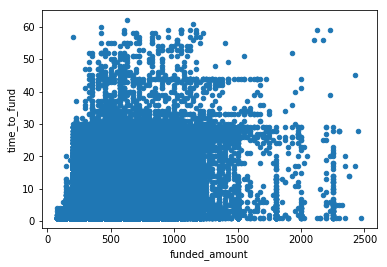

In [99]:
# Keep only the relevant columns
relavant_colums = ['funded_amount', 
                   'time_to_fund']
df = df[relavant_colums] 

# Filter data
funded_small = df.funded_amount < 2_500 # Remove large loans
time_valid = df.time_to_fund > 0 # Remove invalid times
df = df[funded_small & time_valid]

In [106]:
print(f"There are {df.shape[1]:,} columns in the dataframe.")
print(f"There are {df.shape[0]:,} rows in the dataframe.")

There are 2 columns in the dataframe.
There are 67,552 rows in the dataframe.


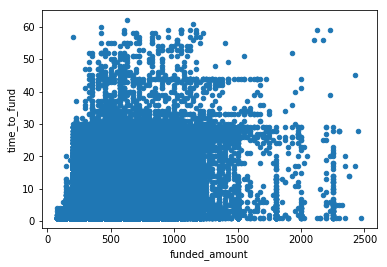

In [107]:
# Plot relationship
df.plot.scatter(x='funded_amount',
                     y='time_to_fund');

----
Fitting our data with k-means using scikit-learn
----

Now we're ready to run the k-means algorithm:

Let's take quick peek at the [scikit-learn's documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [100]:
# Take KMeans class, initialize and fit it our data
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

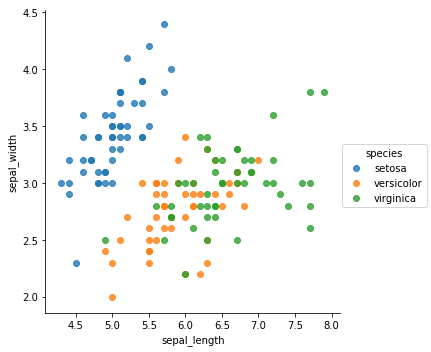

In [101]:
# TODO: Plot clusters with Seaborn

# Scratch code...
iris = sns.load_dataset('iris')

sns.lmplot(x="sepal_length", 
           y="sepal_width", 
           data=iris, 
           fit_reg=False, 
           hue='species', # Use the 'hue' argument to provide a factor variable
           legend=True);

Determining the number of clusters
-----

We arbitrarily set the number of clusters to be 3. But determining the appropriate number of clusters (k) is actually one of the most challenging parts of clustering. There is no hard and fast rule for what the value of k should be because the number of clusters will depend on your data and what the goal of your analysis. The number of groups you choose to partition in your data directly influences the results you'll find. In most areas of data analysis, it's attractive to take as granular an approach as possible, but having too many clusters can be counterproductive

_Is it possible to have too many clusters? Or too few clusters?_

Think about these extreme examples: 

1. A single cluster for all your data 
2. A cluster for each data point

Neither of these will tell you anything new about your data! 

Rather, clustering is most effective when observations in the same cluster are very similar to each other. Also, we want observations in different clusters to be as different from each other as possible.

Elbow method to explore number of clusters
------

![](images/elbow_method.png)

The <b>elbow method</b> is a simple, intuitive way of exploring how changing the number of clusters impacts the "tightness" of the clusters. As k increases, the centroids are closer to the clusters centroids. The improvements will decline, at some point rapidly, creating the elbow shape.



What the elbow method does is this:

1. Run the k-means algorithm over your dataset for a range of k (say from 1 to 10)
2. For each value of k, calculate the sum of squared errors (SSE)
3. If we see an "elbow" in our plotted check, then that marks a good value for k


In [102]:
# Let's fit a different model for each value of k
k_values = range(1, 10)
k_mean_models = [KMeans(n_clusters=i) for i in k_values] # Fit a model for each value of k
scores = [-k_mean_models[i].fit(df).score(df) for i, model in enumerate(k_mean_models)] # See how the scores change

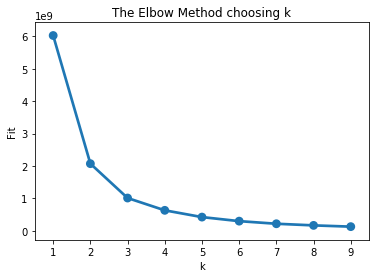

In [103]:
# Let's plot the effect k on the clustering
ax = sns.pointplot(x=list(k_values),
                   y=scores);
ax.set(xlabel='k', 
       ylabel='Fit', 
       title='The Elbow Method choosing k');

Summary
------

- We talked about how supervised learning finds patterns in data.
- Clustering is finding groups within a dataset.
- K-means clustering is a popular clustering technique that iteratively finds the best groups and center/means of groups.
- We fit k-means to data and evaluated the results.

Next Steps
-----

Apply the K-means clustering algorithm with a new pair of features. Find the an useful number of clusters (k).

Further study
-----

If you are interested in a more theory behind k-means, a great place to start is [here](https://www-users.cs.umn.edu/~kumar/dmbook/ch8.pdf). 

There are many other clustering methods. Another popular method is [hierarchical clustering](https://en.wikipedia.org/wiki/Hierarchical_clustering).

<br>
<br> 
<br>

----